In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')
wd = "/content/drive/MyDrive/Personal/Apziva"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

###Data Exploration

In [3]:
# Load data and check for NaNs
df = pd.read_csv(f"{wd}/ACME-HappinessSurvey2020.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
df["Y"].value_counts()

,count
Y,
1,69
0,57


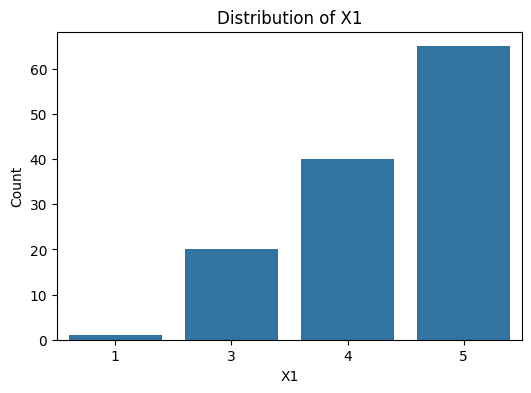

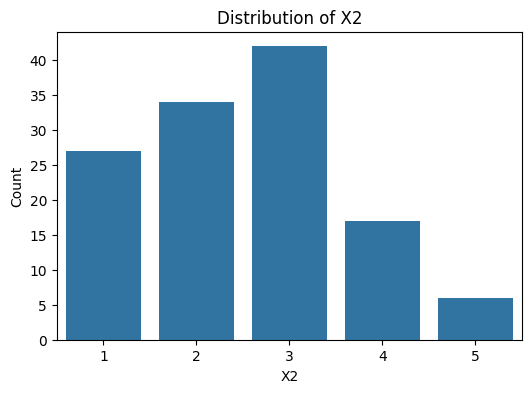

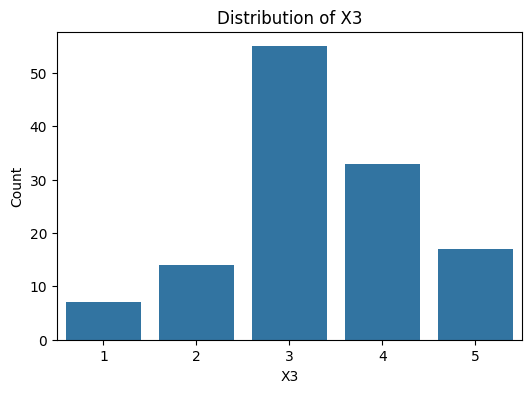

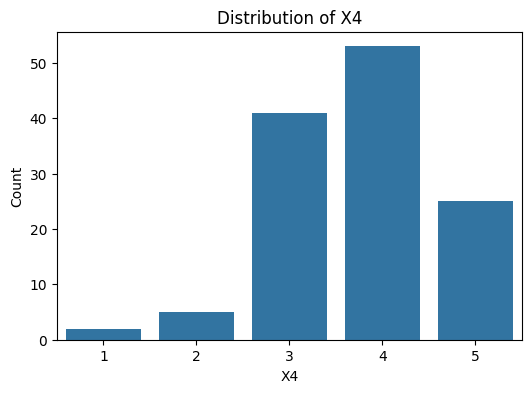

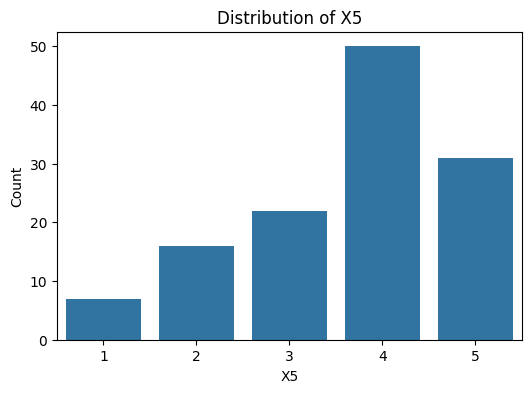

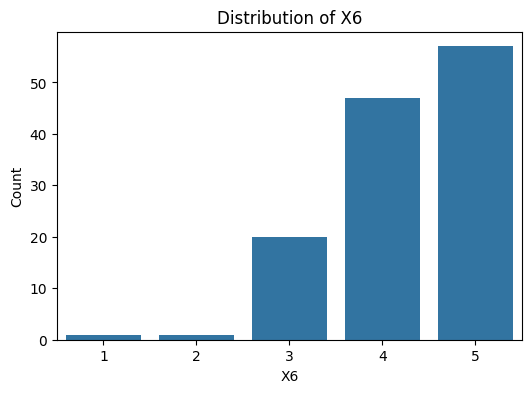

In [8]:
#Check distrubution
cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

###Data Prep

In [10]:
y = df.pop("Y") #cool
X = df

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

###Logistic Regression

In [6]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
# Model Metrics
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
print('test accuracy:', accuracy_score(y_test, y_pred_test))
print('train accuracy:', accuracy_score(y_train, y_pred_train))

test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009


In [19]:
# Grid Search
models = {}
validation_accs = []
for c in [np.inf, 1000,100,10,1,0.1,0.01,0.001,0.0001]:
    print('C = '+ str(c))
    if c == np.inf:
        lr = LogisticRegression(max_iter = 1000, penalty= None)
    else:
        lr = LogisticRegression(max_iter = 1000, penalty='elasticnet', C = c)
    lr.fit(X_train, y_train)
    models[c] = lr
    y_train_pred = lr.predict(X_train)
    print('test accuracy:', accuracy_score(y_test, y_pred_test))
    print('train accuracy:', accuracy_score(y_train, y_pred_train))

C = inf
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009
C = 1000
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009
C = 100
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009
C = 10
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009
C = 1
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009
C = 0.1
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009
C = 0.01
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009
C = 0.001
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009
C = 0.0001
test accuracy: 0.38461538461538464
train accuracy: 0.5929203539823009


###Random Forest

In [12]:
# Random Forrest prediction and importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score = True)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [13]:
y_pred_test = rf.predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred_test))
y_pred_test = rf.predict(X_test)
print("Test accuracy:",accuracy_score(y_test, y_pred_test))

0.6153846153846154